In [5]:
# pip install tensorflow

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
df = pd.read_csv('Churn_Modelling.csv')

In [8]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
# 2. Preprocess the dataset
# Drop columns that aren’t relevant to the prediction, such as RowNumber, CustomerId, and Surname.
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [10]:
# Separate the dataset into X (features) and y (target variable) where Exited is the target.
X = df.drop(columns = ['Exited']) # feature
y = df['Exited'] # Target (1 = Churn, 0 = Not Churn)

In [11]:
# Encode categorical variables, Geography and Gender, using LabelEncoder to convert them into numerical format.
le_geography = LabelEncoder()
le_gender = LabelEncoder()
X['Geography'] = le_geography.fit_transform(X['Geography'])
X['Gender'] = le_gender.fit_transform(X['Gender'])

In [12]:
# 3. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 4. Normalise the data
# Normalize both X_train and X_test using StandardScaler to ensure each feature has mean 0 and standard deviation 1. 
# This helps the neural network to converge faster.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# 5. Initialize and build the neural network model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # Input Layer: A dense layer with 16 nodes and relu activation function.
model.add(Dense(8, activation='relu'))  # Hidden Layer: Another dense layer with 8 nodes and relu activation.
model.add(Dense(1, activation='sigmoid'))  # Output Layer: A dense layer with 1 node and sigmoid activation (since this is a binary classification problem).

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# compile the model using adam optimizer and binary_crossentropy loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.1, verbose=1)

Epoch 1/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - accuracy: 0.7237 - loss: 0.5528 - val_accuracy: 0.8313 - val_loss: 0.4061
Epoch 2/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.8148 - loss: 0.4232 - val_accuracy: 0.8400 - val_loss: 0.3910
Epoch 3/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.8399 - loss: 0.3924 - val_accuracy: 0.8438 - val_loss: 0.3726
Epoch 4/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.8348 - loss: 0.3881 - val_accuracy: 0.8438 - val_loss: 0.3588
Epoch 5/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.8488 - loss: 0.3732 - val_accuracy: 0.8537 - val_loss: 0.3531
Epoch 6/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.8458 - loss: 0.3704 - val_accuracy: 0.8500 - val_loss: 0.3504
Epoch 7/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.8478 - loss: 0.3673 - val_accuracy: 0.8525 - val_loss: 0.3444
Epoch 8/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.8504 - loss: 0.3496 - 

In [17]:
# 6. Evaluate the model
# Predict the target on the test data and convert predictions into binary (0 or 1) based on a threshold of 0.5
# Predict on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.859


In [19]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1533   74]
 [ 208  185]]


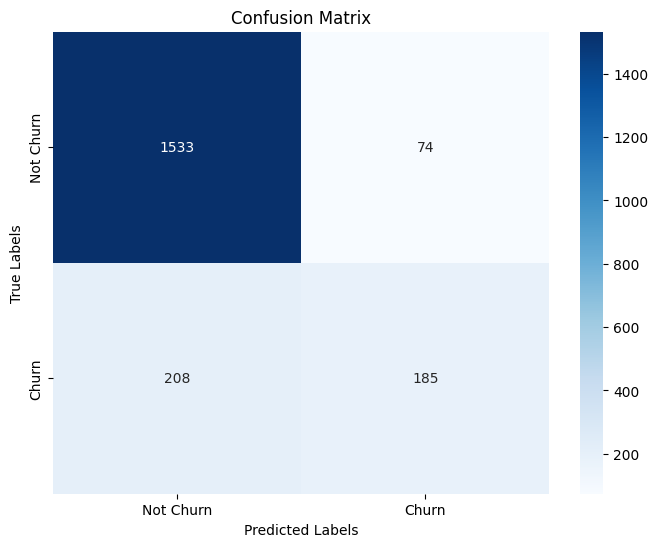

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.71      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

